# Outlier Analysis/Histograms and Box Plots

@authors: vcle, bpuhani

In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

## Loading the necessary data.
For this notebook to work, we must load the ensembles from a pickle file that holds the data from running our chain.
And load the stats from the approved plan.

this requires running first:
* `B_6_IL_run_chain.ipynb`
* `B_7_IL_get_approved_plan_stats.ipynb`

The lists in the two dictionaries are labeled as follows:
* `list_of_nr_of_cut_edges`
* `list_of_dem_won_districts_pre20`
* `list_of_dem_won_districts_uss20`
* `list_of_eg_pre20`
* `list_of_eg_uss20`
* `list_of_dem_percents_pre20`
* `list_of_dem_percents_uss20`

In [2]:
# Load the 40_000 steps from running the gerrychain data from the .pkl file
with open('checkpoints/IL_plot_results_40_000.pkl', 'rb') as file:
    checkpoint_dict = pickle.load(file)

In [3]:
# Load the approved plan stats from the .pkl file
with open('checkpoints/IL_approved_congress_stats.pkl', 'rb') as file:
    approved_plan_stats = pickle.load(file)

### Split the checkpoint_dict into one with all the data and one with half the data

In [4]:
ensemble_with_40_000 = checkpoint_dict

In [5]:
# Split each key into two halfes and use only the first half
ensemble_with_20_000 = {
    key: value[:len(value) // 2] for key, value in checkpoint_dict.items()
}

Double-check that the length of the two ensembles is correct.

In [6]:
assert len(ensemble_with_40_000["list_of_nr_of_cut_edges"]) == 40_000

In [7]:
assert len(ensemble_with_20_000["list_of_nr_of_cut_edges"]) == 20_000

## Cut Edges Ensemble

In [8]:
# Extract the cut-edge ensemble
cut_edge_ensemble_with_40000 = ensemble_with_40_000["list_of_nr_of_cut_edges"]
print(len(cut_edge_ensemble_with_40000))

40000


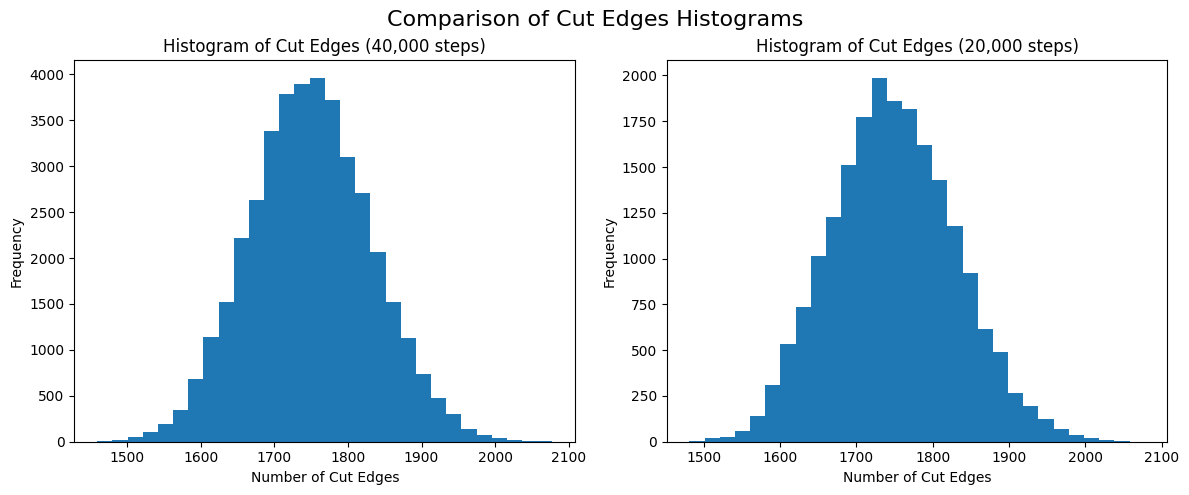

In [9]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the 40,000 steps histogram in the first subplot
counts1, bins1, patches1 = ax1.hist(cut_edge_ensemble_with_40000, align='mid', bins=30)
ax1.set_title("Histogram of Cut Edges (40,000 steps)")
ax1.set_xlabel("Number of Cut Edges")
ax1.set_ylabel("Frequency")

# Get the 20,000 steps data
cutedge_ensemble_with_20_000 = ensemble_with_20_000["list_of_nr_of_cut_edges"]

# Plot the 20,000 steps histogram in the second subplot
counts2, bins2, patches2 = ax2.hist(cutedge_ensemble_with_20_000, align='mid', bins=30)
ax2.set_title("Histogram of Cut Edges (20,000 steps)")
ax2.set_xlabel("Number of Cut Edges")
ax2.set_ylabel("Frequency")

# Add a main title to the figure
fig.suptitle("Comparison of Cut Edges Histograms", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Make room for the suptitle

plt.show()

#### We see below that the histograms of the two produce a similar distribution shape, which suggests convergence.

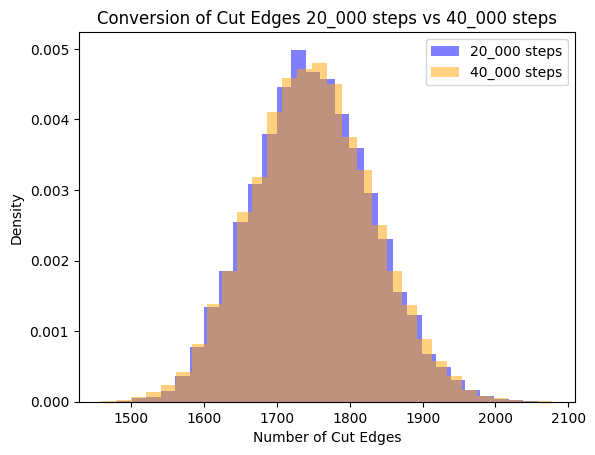

In [10]:
# Overlay the histograms
plt.figure()
# Define common bins for both histograms
bins = 30
# Get histogram data for 20_000 steps
counts_20k, bins_20k = np.histogram(cutedge_ensemble_with_20_000, bins=bins)
# Plot histogram for 20_000 steps
plt.hist(cutedge_ensemble_with_20_000, bins=bins, alpha=0.5, label="20_000 steps", color="blue", align='mid', density=True)

# Get histogram data for 40_000 steps
counts_40k, bins_40k = np.histogram(cut_edge_ensemble_with_40000, bins=bins)
# Plot histogram for 40_000 steps
plt.hist(cut_edge_ensemble_with_40000, bins=bins, alpha=0.5, label="40_000 steps", color="orange", align='mid', density=True)

plt.title("Conversion of Cut Edges 20_000 steps vs 40_000 steps")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Density")
plt.legend()  # Add a legend to distinguish the datasets
plt.show()

A conversation is definitely visible.

So we are using the 20_000 steps for the following analysis.

### Cut Edges Ensemble compared with the proposed plan

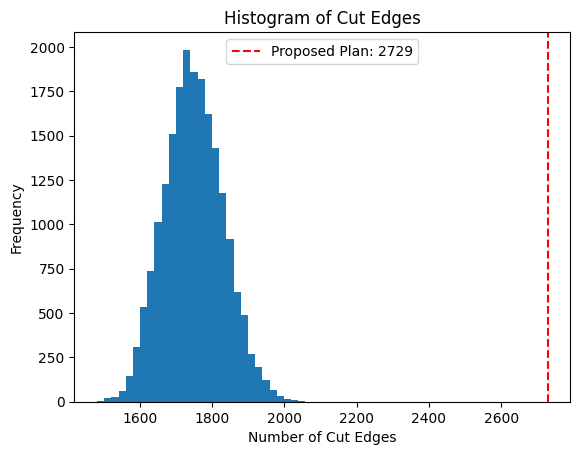

In [11]:
# Plot the histogram
plt.figure()
# Get histogram data
counts, bins, patches = plt.hist(cutedge_ensemble_with_20_000, align='mid', bins=30)  # Changed to mid alignment
plt.axvline(x=approved_plan_stats["list_of_nr_of_cut_edges"][0], color='r', linestyle='--', label=f'Proposed Plan: {approved_plan_stats["list_of_nr_of_cut_edges"][0]}')
plt.title("Histogram of Cut Edges")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Frequency")
plt.legend()

plt.show()

reasons could be:
* gerrymandering
* approved plan has 60 holes so that will generate more cut edges

### Democratic-Won Districts (PRE20)

In [12]:
# Extract the Democratic-won Districts for the 2020 Presidential Election
dem_won_districts_pre20_ensemble = ensemble_with_20_000["list_of_dem_won_districts_pre20"]
print(len(dem_won_districts_pre20_ensemble))

20000


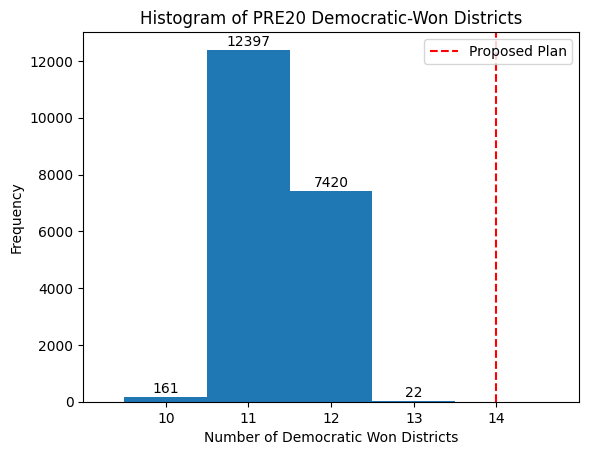

In [13]:
# Plot the Democratic-won Districts for the 2020 Presidential Election histogram
plt.figure()
# Define bin edges to ensure bars are centered on integer values
bin_edges = [9.5, 10.5, 11.5, 12.5, 13.5, 14.5]
# Get histogram data
counts, bins, patches = plt.hist(dem_won_districts_pre20_ensemble, bins=bin_edges, align='mid')
plt.axvline(x=approved_plan_stats["list_of_dem_won_districts_pre20"][0], color='r', linestyle='--', label=f'Proposed Plan')
plt.title("Histogram of PRE20 Democratic-Won Districts")
plt.xlabel("Number of Democratic Won Districts")
plt.ylabel("Frequency")
plt.legend()
plt.xticks([10, 11, 12, 13, 14])  # Only show these values on x-axis
plt.xlim(9, 15)

# Add count labels above each bar
for i, count in enumerate(counts):
    if count > 0:  # Only add label if the bar exists
        plt.text(bins[i] + 0.5, count + 50, str(int(count)), ha='center', va='bottom', fontsize=10)

plt.show()

### Democratic-Won Districts (USS20)

In [14]:
# Extract the Democratic-won Districts for the 2020 Senate Election
dem_won_districts_uss20_ensemble = ensemble_with_20_000["list_of_dem_won_districts_uss20"]
print(len(dem_won_districts_uss20_ensemble))

20000


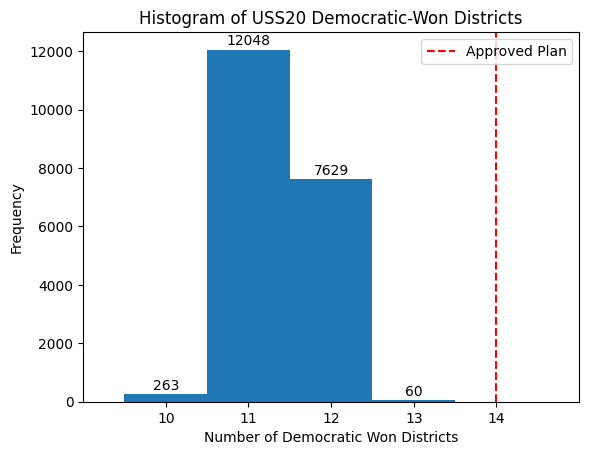

{10, 11, 12, 13}


In [15]:
# Plot the Democratic-won Districts for the 2020 Senate Election Histogram
plt.figure()
# Define bin edges to ensure bars are centered on integer values
bin_edges = [9.5, 10.5, 11.5, 12.5, 13.5, 14.5]
# Get histogram data
counts, bins, patches = plt.hist(dem_won_districts_uss20_ensemble, bins=bin_edges, align='mid')
plt.axvline(x=approved_plan_stats["list_of_dem_won_districts_uss20"][0], color='r', linestyle='--', label=f'Approved Plan')
plt.title("Histogram of USS20 Democratic-Won Districts")
plt.xlabel("Number of Democratic Won Districts")
plt.ylabel("Frequency")
plt.xticks([10, 11, 12, 13, 14])  # Only show these values on x-axis
plt.xlim(9, 15)

# Add count labels above each bar
for i, count in enumerate(counts):
    if count > 0:  # Only add label if the bar exists
        plt.text(bins[i] + 0.5, count + 50, str(int(count)), ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()

print(set(dem_won_districts_uss20_ensemble))

### Efficiency Gap (PRE20)

In [16]:
# Extract the Efficiency Gap Values for PRE20
eg_pre20_ensemble = checkpoint_dict["list_of_eg_pre20"]
print(len(eg_pre20_ensemble))

40000


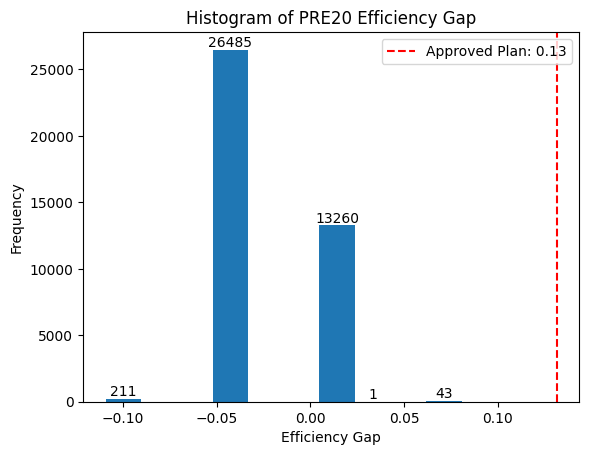

In [17]:
# Plot the Efficiency Gap Values for PRE20 Histogram
plt.figure()
# Get histogram data
counts, bins, patches = plt.hist(eg_pre20_ensemble, align='mid')
plt.axvline(x=approved_plan_stats["list_of_eg_pre20"][0], color='r', linestyle='--', label=f'Approved Plan: {approved_plan_stats["list_of_eg_pre20"][0]:.2}')
plt.title("Histogram of PRE20 Efficiency Gap")
plt.xlabel("Efficiency Gap")
plt.ylabel("Frequency")
plt.legend()

# Add count labels above each bar
for i, count in enumerate(counts):
    if count > 0:  # Only add label if the bar exists
        # Calculate the center of the bin
        bin_center = (bins[i] + bins[i+1]) / 2
        # Add text with count, rotated 90 degrees for better visibility
        plt.text(bin_center, count + 2, str(int(count)), ha='center', va='bottom', fontsize=10)

plt.show()

### Efficiency Gap (USS20)

In [18]:
# Extract the Efficiency Gap Values for USS20
eg_uss20_ensemble = ensemble_with_20_000["list_of_eg_uss20"]
print(len(eg_uss20_ensemble))

20000


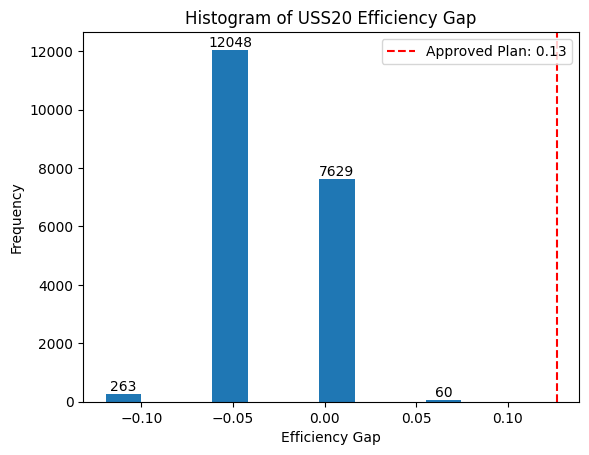

In [19]:
# Plot the Efficiency Gap Values for USS20 Histogram
plt.figure()
# Get histogram data
counts, bins, patches = plt.hist(eg_uss20_ensemble, align='mid')
plt.axvline(x=approved_plan_stats["list_of_eg_uss20"][0], color='r', linestyle='--', label=f'Approved Plan: {approved_plan_stats["list_of_eg_uss20"][0]:.2}')
plt.title("Histogram of USS20 Efficiency Gap")
plt.legend()
plt.xlabel("Efficiency Gap")
plt.ylabel("Frequency")

# Add count labels above each bar
for i, count in enumerate(counts):
    if count > 0:  # Only add label if the bar exists
        # Calculate the center of the bin
        bin_center = (bins[i] + bins[i+1]) / 2
        # Add text with count, rotated 90 degrees for better visibility
        plt.text(bin_center, count + 5, str(int(count)), ha='center', va='bottom', fontsize=10)

plt.show()

## Boxplot (Signature of Gerrymandering)

#### Boxplot for PRE20 Democratic Vote Percents

In [20]:
# Extract PRE20 Democratic Percents list
dem_percents_pre20_ensemble = ensemble_with_20_000["list_of_dem_percents_pre20"]
print(len(dem_percents_pre20_ensemble))

20000


In [21]:
dem_percents_pre20_approved_plan = approved_plan_stats["list_of_dem_percents_pre20"]

In [22]:
# Convert list into a Pandas DataFrame so that we can use Pandas boxplot method
dem_percents_pre20_df = pd.DataFrame(dem_percents_pre20_ensemble)

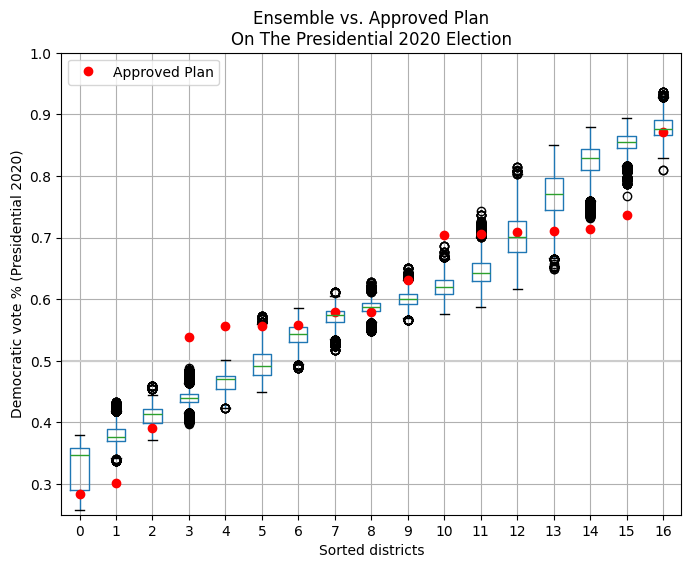

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
dem_percents_pre20_df.boxplot(ax=ax, positions=range(len(dem_percents_pre20_df.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row, which corresponds to the initial plan)
plt.plot(dem_percents_pre20_approved_plan[0], "ro", label="Approved Plan")

# Annotate
ax.set_title("Ensemble vs. Approved Plan\nOn The Presidential 2020 Election")
ax.set_ylabel("Democratic vote % (Presidential 2020)")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0.25, 1)
ax.set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.legend(loc="upper left")
plt.savefig('images/ILbox_plotPres2020.svg')
plt.show()

Ideas:
* focus on the sorted Districts with Nr. 3, 4, 5 because these are heavily outliers.
* Create line from all means of the ensembles
* Create line from the approved plan
* See that approved line is more like a staircase
* see that the ensemble is more like a straight inclined line

#### Boxplot for USS20 Democratic Vote Percents

In [24]:
# Extract USS20 Democratic Percents list
dem_percents_uss20_ensemble = ensemble_with_20_000["list_of_dem_percents_uss20"]
print(len(dem_percents_uss20_ensemble))

20000


In [25]:
dem_percents_uss20_approved_plan = approved_plan_stats["list_of_dem_percents_uss20"]

In [26]:
# Convert list into a Pandas DataFrame so that we can use Pandas boxplot method
dem_percents_uss20_df = pd.DataFrame(dem_percents_uss20_ensemble)

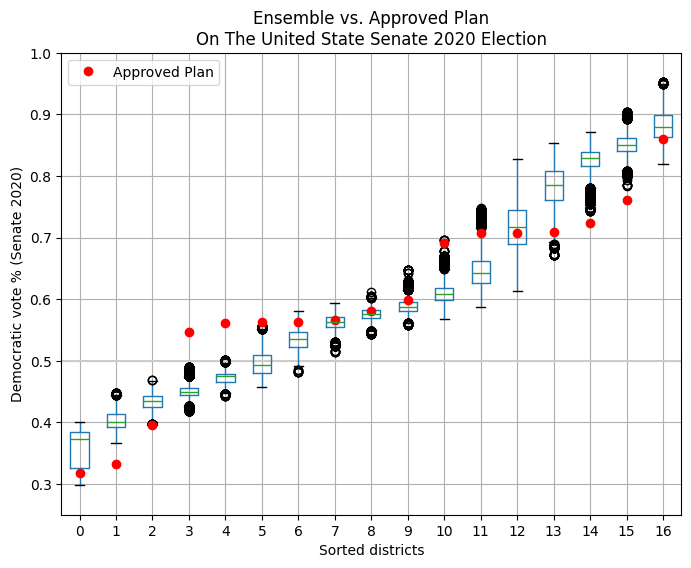

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
dem_percents_uss20_df.boxplot(ax=ax, positions=range(len(dem_percents_uss20_df.columns)))

plt.plot(dem_percents_uss20_approved_plan[0], "ro", label="Approved Plan")

# Annotate
ax.set_title("Ensemble vs. Approved Plan\nOn The United State Senate 2020 Election")
ax.set_ylabel("Democratic vote % (Senate 2020)")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0.25, 1)
ax.set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.legend(loc="upper left")
plt.savefig('images/ILbox_plotSen2020.svg')
plt.show()


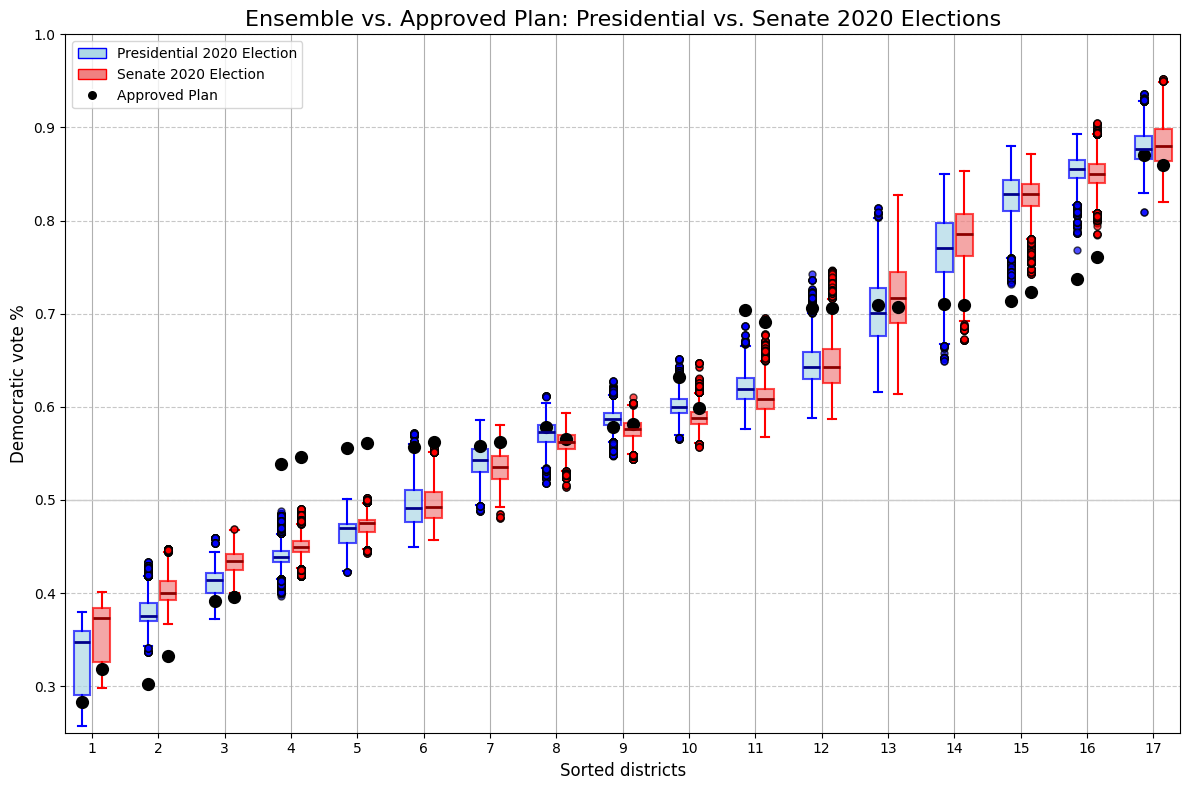

In [38]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Draw 50% line
ax.axhline(0.5, color="#cccccc", linestyle='-', linewidth=1)

# Number of districts
num_districts = len(dem_percents_pre20_df.columns)

# Set positions for the box plots
positions_pres = np.arange(num_districts) * 2 - 0.3  # Offset to the left
positions_senate = np.arange(num_districts) * 2 + 0.3  # Offset to the right

# Draw box plots for Presidential 2020 with blue color
bp_pres = dem_percents_pre20_df.boxplot(ax=ax, positions=positions_pres,
                                        patch_artist=True, return_type='dict')

# Draw box plots for Senate 2020 with red color
bp_senate = dem_percents_uss20_df.boxplot(ax=ax, positions=positions_senate,
                                          patch_artist=True, return_type='dict')

# Customize colors for Presidential boxplots
for box in bp_pres['boxes']:
    box.set(color='blue', linewidth=1.5)
    box.set(facecolor='lightblue', alpha=0.7)
for median in bp_pres['medians']:
    median.set(color='darkblue', linewidth=2)
for whisker in bp_pres['whiskers']:
    whisker.set(color='blue', linewidth=1.5)
for cap in bp_pres['caps']:
    cap.set(color='blue', linewidth=1.5)
for flier in bp_pres['fliers']:
    flier.set(marker='o', markerfacecolor='blue', markersize=5, alpha=0.7)

# Customize colors for Senate boxplots
for box in bp_senate['boxes']:
    box.set(color='red', linewidth=1.5)
    box.set(facecolor='lightcoral', alpha=0.7)
for median in bp_senate['medians']:
    median.set(color='darkred', linewidth=2)
for whisker in bp_senate['whiskers']:
    whisker.set(color='red', linewidth=1.5)
for cap in bp_senate['caps']:
    cap.set(color='red', linewidth=1.5)
for flier in bp_senate['fliers']:
    flier.set(marker='o', markerfacecolor='red', markersize=5, alpha=0.7)

# Plot approved plans
ax.plot(positions_pres, dem_percents_pre20_approved_plan[0], 'ko', markersize=8,
        markeredgecolor='black', markeredgewidth=1.5)
ax.plot(positions_senate, dem_percents_uss20_approved_plan[0], 'ko', markersize=8,
        markeredgecolor='black', markeredgewidth=1.5)

# Annotate
ax.set_title("Ensemble vs. Approved Plan: Presidential vs. Senate 2020 Elections", fontsize=16)
ax.set_ylabel("Democratic vote %", fontsize=12)
ax.set_xlabel("Sorted districts", fontsize=12)
ax.set_ylim(0.25, 1)
ax.set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Set x-axis ticks at the middle of each district pair
ax.set_xticks(np.arange(num_districts) * 2)
ax.set_xticklabels(range(1, num_districts + 1))

# Create custom legend handles
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Create custom handles for the legend
pres_box = mpatches.Patch(color='lightblue', ec='blue', label='Presidential 2020 Election')
senate_box = mpatches.Patch(color='lightcoral', ec='red', label='Senate 2020 Election')
approved_plan_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='k',
                    markeredgewidth=1.5, markersize=8,
                    label='Approved Plan')

# Add the custom legend with both box plots and points
ax.legend(handles=[pres_box, senate_box, approved_plan_point],
          loc="upper left", fontsize=10)

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('images/IL_combined_elections_boxplot.svg')
plt.show()